Tahap 1. menampilkan informasi dataset, ringkasa dataset, baseline 1.1 (statistik, korelasi dan visualisasi hubungan faktor)

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
# baca dataset
df = pd.read_csv("obesity_level.csv")

====Informasi Dataset=====

In [ ]:
# tampilkan 11 baris pertama
df.head(11)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,1,1,2.919751,3.000000,Sometimes,0,2.137550,0,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,1,1,1.991240,3.000000,Sometimes,0,2.000000,0,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,1,1,1.397468,3.000000,Sometimes,0,2.000000,0,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,0,1,2.000000,3.000000,Sometimes,0,3.000000,1,1.000000,1.000000,0,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,1,1,3.000000,3.000000,Sometimes,0,2.632253,0,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
# informasi label dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [ ]:
# ringkasan statistik label dataset numerik
print(df.describe())

                id           Age        Height        Weight  \
count  20758.00000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768   
std     5992.46278      5.688072      0.087312     26.379443   
min        0.00000     14.000000      1.450000     39.000000   
25%     5189.25000     20.000000      1.631856     66.000000   
50%    10378.50000     22.815416      1.700000     84.064875   
75%    15567.75000     26.000000      1.762887    111.600553   
max    20757.00000     61.000000      1.975663    165.057269   

       family_history_with_overweight          FAVC          FCVC  \
count                    20758.000000  20758.000000  20758.000000   
mean                         0.819636      0.914443      2.445908   
std                          0.384500      0.279716      0.533218   
min                          0.000000      0.000000      1.000000   
25%                          1.000000      1.000000      2.000000   
50%      

In [54]:
# ringkasan kategori. disini kami mengambil label Gender, Obesity Level
print(df['Gender'].value_counts())
print('\n')
print('Level Obestitas', df['0be1dad'].value_counts())

Gender
Female    10422
Male      10336
Name: count, dtype: int64


Level Obestitas 0be1dad
Obesity_Type_III       4046
Obesity_Type_II        3248
0rmal_Weight           3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64


=====Baseline tahap 1=====

-Statistik Deskriptif

In [43]:
# Interpretasi BMI
# formula BMI = berat(kg) / tinggi(m)^2
df['BMI'] = df['Weight'] / (df['Height']**2)

In [ ]:
# ringkasan label BMI
print(df['BMI'].describe())

count    20758.000000
mean        30.241842
std          8.333932
min         12.868541
25%         24.088223
50%         29.384757
75%         37.011168
max         54.997991
Name: BMI, dtype: float64


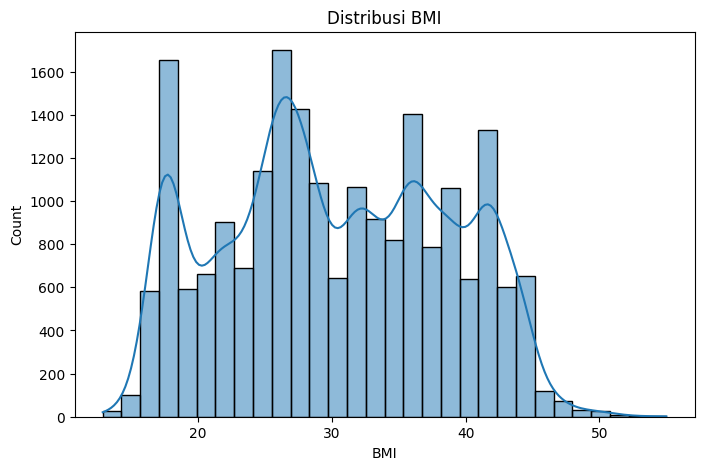

In [45]:
# distribusi BMI
plt.figure(figsize=(8,5))
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title("Distribusi BMI")
plt.show()

-Korelasi antar variabel numerik

In [46]:
# pilih kolom numerik
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [48]:
# hitung korelasi
corr = df[num_cols].corr()

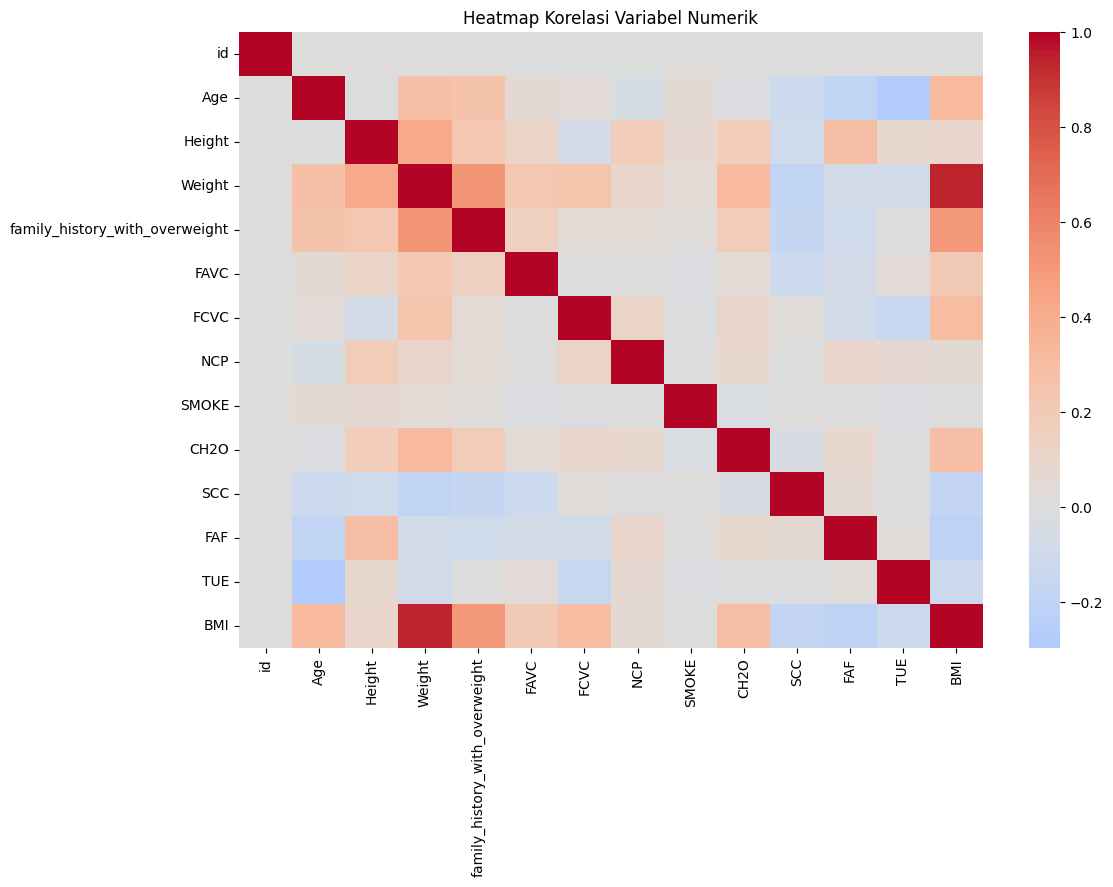

In [49]:
# heatmap korelasi
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

-Distribusi target (Obesity Level)

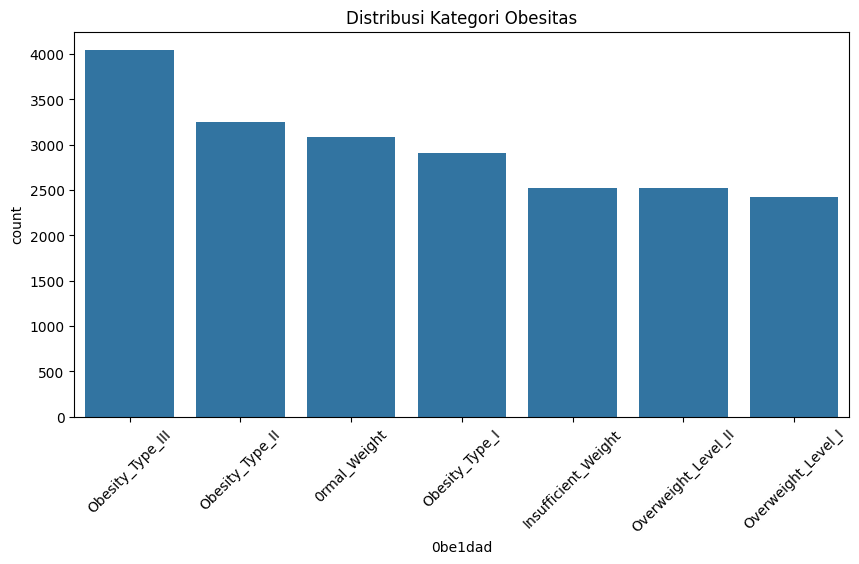

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='0be1dad', order=df['0be1dad'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribusi Kategori Obesitas")
plt.show()

-Visualisasi hubungan faktor dengan obesitas

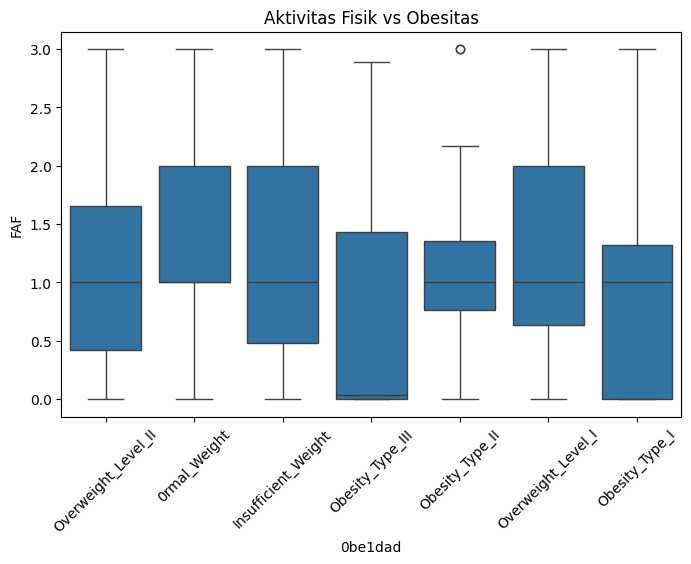

In [ ]:
# Aktivitas fisik vs obesitas dalam bentuk boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='0be1dad', y='FAF')
plt.xticks(rotation=45)
plt.title("Aktivitas Fisik vs Obesitas")
plt.show()

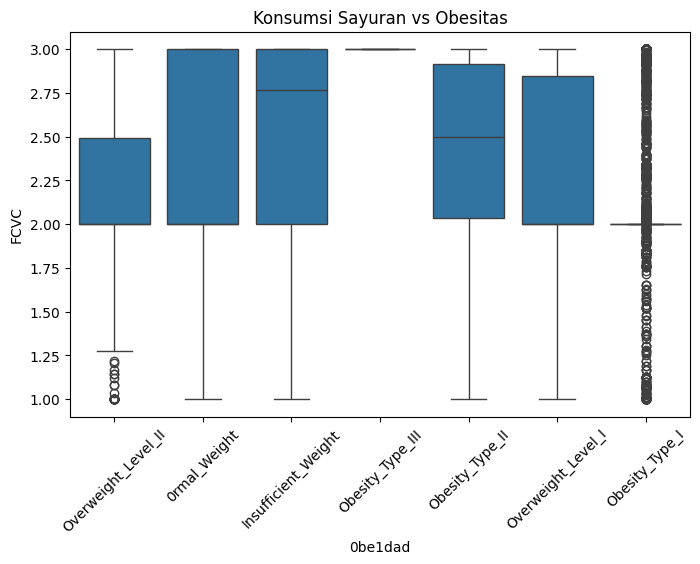

In [ ]:
# Konsumsi sayuran vs obesitas dalam bentuk boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='0be1dad', y='FCVC')
plt.xticks(rotation=45)
plt.title("Konsumsi Sayuran vs Obesitas")
plt.show()

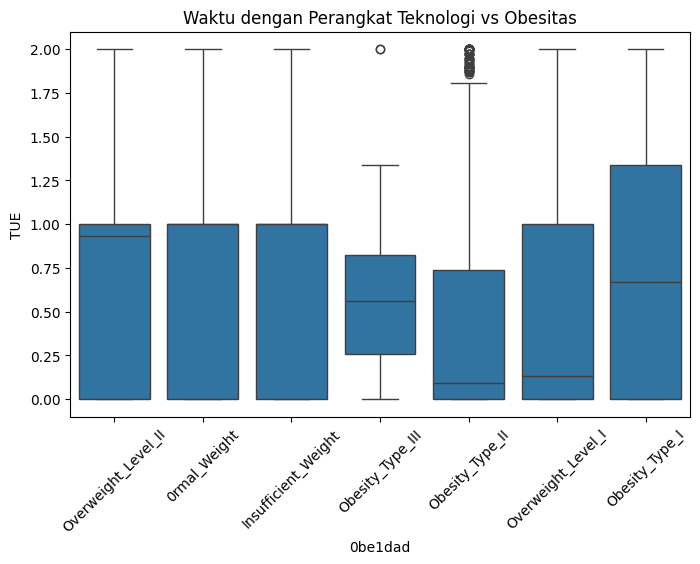

In [ ]:
# Waktu dengan gadget (TUE) vs obesitas dalam bentuk boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='0be1dad', y='TUE')
plt.xticks(rotation=45)
plt.title("Waktu dengan Perangkat Teknologi vs Obesitas")
plt.show()